# Sampling
By sampling, a continuous signal is transformed to a discrete signal. The original signal is replaced by an (rescaled) impulse train. The value of the impulse at moment kT equals the value of f(kT). It's important to choose a good sampling speed. If the sampling speed is to fast, the signal is hardly changed and we have an overhead of samples. If the sampling speed is to slow, we cann't reconstruct the original signal.

## Signal
Choose a signal of the list, adjust the signal and press run.

:0: FutureWarning: IPython widgets are experimental and may change in the future.


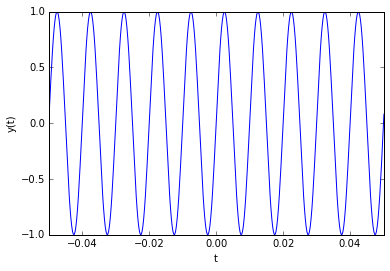

In [1]:
from sampling import *
%matplotlib inline


display(box)

## Fourier Transform
In this section we calculate the fourier transform of the signal. Because a computer cann't work with signals, there might small errors on the fourier transform due to numerical errors and the fact that you cann't represent a continue signal. 

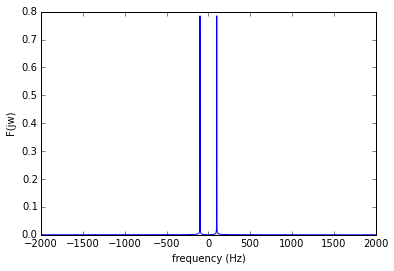

In [2]:
from sampling import y_signal,t_signal
y_signalf = fourier.fftshift(2.0/N * np.abs(fourier.fft(y_signal)))
t_signalf = np.linspace(-1.0/(2.0*T), 1.0/(2.0*T), N)
plt.plot(t_signalf,y_signalf)
plt.xlabel('frequency (Hz)')
plt.ylabel('F(jw)')
plt.show()

16393


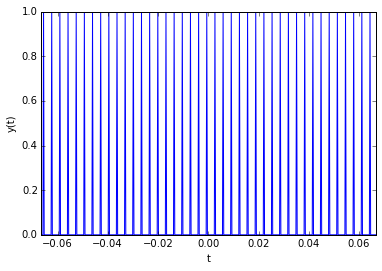

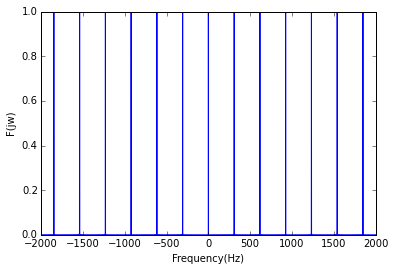

<function sampling.sampling_dirac>

In [3]:
widgets.interact(sampling_dirac,f_s=(100.0,500.0,10.0))


## Sampling speed
Choose the sampling speed of the signal. Make sure that the sampling frequention is bigger than two times the bandwidth.

## Sampling in discrete time
We now sample the original signal. We multiply the original signal and the impulse train. Be patient, it may take a wile.

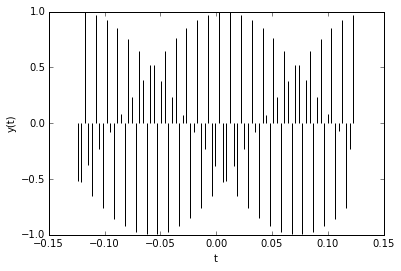

In [4]:
from sampling import y_signal,t_signal,y_dirac
dis_t = y_dirac * y_signal
#plt.plot(dis_t)
draw_sampeled_signal(t_signal,dis_t)



## Sampling in fourier spectrum
The multiplication in the time spectrum becomes a convolution in the fourier spectrum. If the sampling speed was to slow overlap will occur.

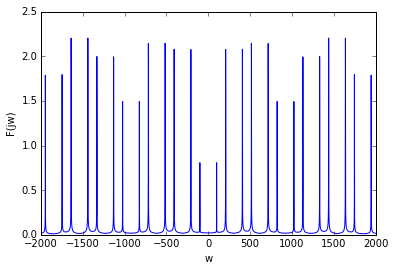

In [5]:
from sampling import y_diracf
samplef = np.convolve(y_signalf,y_diracf,'same')
N_sample = len(samplef)
ct = np.linspace(-1.0/(2.0*T_dirac), 1.0/(2.0*T_dirac),len(samplef) )
plt.plot(ct,samplef)
plt.xlabel('w')
plt.ylabel('F(jw)')
plt.show()

## Reconstruction
Now we try to reconstruct the original signal using the calculated samples.

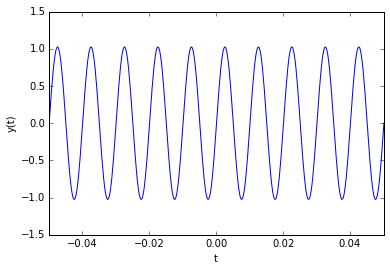

In [6]:
from sampling import t_signal,f_bem,xmin,xmax
w_0 = 2*np.pi*f_bem
reconstruct = np.sin(w_0*t_signal/2)/(w_0*t_signal/2)
res = np.convolve(dis_t,reconstruct,'same')
plt.plot(t_signal,res)
plt.xlim(xmin,xmax)
plt.xlabel('t')
plt.ylabel('y(t)')
plt.show()